In [1]:
import base64
from datetime import datetime, timedelta
import json
import os
import sys

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj.crs import CRS
from pystac_client import Client
import seaborn as sns
from shapely.geometry import box, Point, Polygon

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from library import utils
from FH_Hydrosat import FH_Hydrosat

In [2]:
# Insitu point locations
insitu_met_points = {
    'Corn': [-121.5351, 38.1091],
    'Alfalfa': [-121.4993, 38.0992]
}

# Center point of crop fields.
crop_center_points = {
    'Corn': [-121.5360, 38.1095],
    'Alfalfa': [-121.5015, 38.0994],
    'Ames': [-93.701, 42.000],
}

aoi_bbox = {
    'Alfalfa': [-121.5365, 38.1098, -121.5355, 38.1091],
    'Corn': [-121.5027, 38.0986, -121.5003, 38.1000]
}

In [3]:
# Define paths to data
data_path = os.path.join('../data', 'Ameriflux')
bi1_data_path = os.path.join(data_path, 
                             'US-Bi1_HH_201608130000_202301010000.csv')

In [4]:
# Explore bi1 data
bi1_df = utils.read_ameriflux(bi1_data_path)
print(f'Data range from {bi1_df.index.min()} to {bi1_df.index.max()}')

Data range from 2016-08-13 00:00:00 to 2022-12-31 23:30:00


<Axes: xlabel='NDVI', ylabel='TA'>

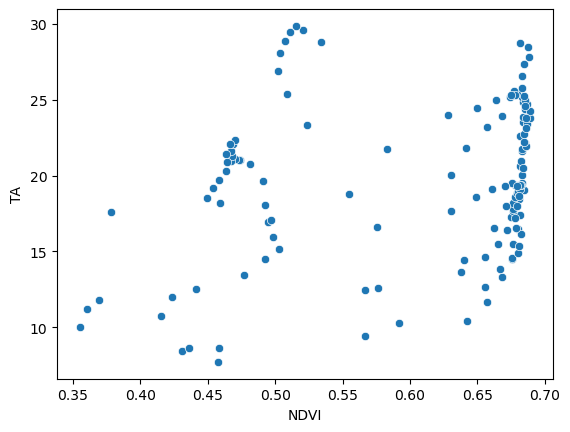

In [5]:
filt = (bi1_df.index > '05-01-2022') & (bi1_df.index < '05-06-2022') & (bi1_df['NDVI'] > 0.25) &  (bi1_df['NDVI'] < 0.75)
sns.scatterplot(x=bi1_df.loc[filt, 'NDVI'], y=bi1_df.loc[filt, 'TA'])

In [6]:
bi1_df_max = bi1_df.resample('1D').max()
bi1_df_max.head()

,end,TIMESTAMP_START,TIMESTAMP_END,CO2,H2O,CH4,FC,FCH4,FC_SSITC_TEST,FCH4_SSITC_TEST,...,SPEC_RED_IN,SPEC_RED_OUT,SPEC_NIR_IN,SPEC_NIR_OUT,NDVI,SPEC_PRI_TGT_IN,SPEC_PRI_TGT_OUT,SPEC_PRI_REF_IN,SPEC_PRI_REF_OUT,PRI
start,,,,,,,,,,,,,,,,,,,,,
2016-08-13,2016-08-14,2.016081e+11,2.016081e+11,503.892362,18.026664,1973.609941,9.283736,15.760946,2.0,2.0,...,1.450,0.031,1.017,0.125,0.795323,1.565,0.039,1.461,0.040,0.143233
2016-08-14,2016-08-15,2.016081e+11,2.016082e+11,651.999119,17.307215,2061.187590,4.725085,5.570765,2.0,2.0,...,1.453,0.033,1.019,0.124,1.000000,1.573,0.038,1.460,0.040,0.082420
2016-08-15,2016-08-16,2.016082e+11,2.016082e+11,560.824478,15.798304,1949.485791,9.283892,11.837167,2.0,2.0,...,1.430,0.052,1.007,0.102,1.000000,1.554,0.048,1.434,0.051,0.004077
2016-08-16,2016-08-17,2.016082e+11,2.016082e+11,494.878409,15.266890,1950.278157,11.638915,10.836450,2.0,2.0,...,1.473,0.055,1.022,0.113,1.000000,1.648,0.053,1.473,0.057,-0.007312
2016-08-17,2016-08-18,2.016082e+11,2.016082e+11,510.193409,16.798386,2005.056536,8.150886,12.250472,2.0,2.0,...,1.464,0.054,1.020,0.101,0.625722,1.629,0.049,1.481,0.051,-0.011925


<Axes: xlabel='start', ylabel='NDVI'>

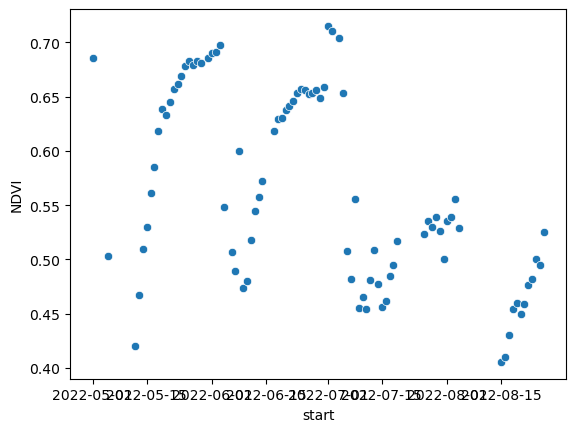

In [7]:
filt = (bi1_df_max.index > '04-30-2022') & (bi1_df_max.index < '08-31-2022') & (bi1_df_max['NDVI'] < 1)
sns.scatterplot(bi1_df_max.loc[filt, 'NDVI'])

<Axes: xlabel='NDVI', ylabel='TA'>

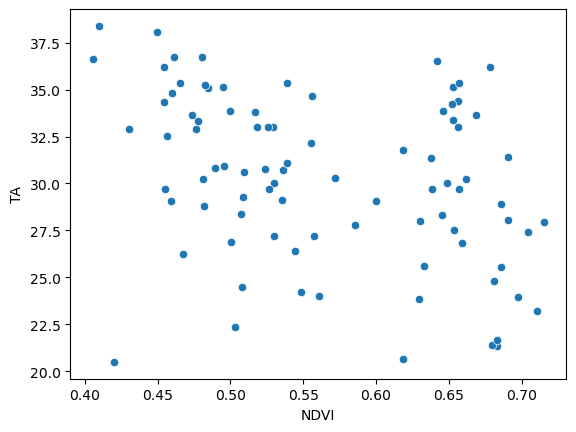

In [8]:
sns.scatterplot(x=bi1_df_max.loc[filt, 'NDVI'], y=bi1_df_max.loc[filt, 'TA'])